Importing the dependencies

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score


# New Section

Data Collection and Processing

In [102]:
#loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')


In [103]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [104]:
#print first 5 rows of dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
#print last 5 rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [106]:
#number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [107]:
#Getting more info about data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [108]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [109]:
#statincal measure about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
#checking the distribution of terget variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1---> Defective Heart

0--->Healthy Heart


Splitting the Features and Target


In [111]:
 X = heart_data.drop(columns='target',axis =1)
 Y = heart_data['target']
 print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

# New Section

In [112]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Trainning & Test Data

In [113]:
X_train, X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.2 , stratify=Y ,random_state=2)

In [114]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Trainning
Logistic Regression

Without Regularization

In [115]:
model = LogisticRegression()

In [116]:
#trainning the LogisticRegression model with Trainning data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
model_2 = LogisticRegression(solver = 'liblinear').fit(X_train , Y_train)

With Regularization

In [118]:
from sklearn.linear_model import LogisticRegressionCV


model_l1 = LogisticRegressionCV(Cs =10,cv=4,penalty ='l1' , solver = 'liblinear').fit(X_train,Y_train)

In [119]:
model_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,Y_train)

In [120]:
model_l2_lbfgs = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train,Y_train)
#Limited-memory Broyden–Fletcher–Goldfarb–Shanno

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [122]:
model_l2_lbfgs_std = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train_std,Y_train)

Predicting And Showing Result


In [123]:
y_pred = list()
y_prob = list()

coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs']
coeff_models = [model, model_2, model_l1,model_l2,model_l2_lbfgs]

for lab,mod in zip(coeff_labels,coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test),name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1),name=lab))

y_pred.append(pd.Series(model_l2_lbfgs_std.predict(X_test_std),name='model_l2_lbfgs_std'))
y_prob.append(pd.Series(model_l2_lbfgs_std.predict_proba(X_test_std).max(axis=1),name='model_l2_lbfgs_std'))

In [124]:
coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs','model_l2_lbfgs_std']

In [125]:
y_pred=pd.concat(y_pred,axis=1)
y_prob=pd.concat(y_prob,axis=1)

In [126]:
y_pred.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,0,0,0,0,1


In [127]:
y_prob.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,0.992525,0.992095,0.995740,0.995799,0.996193,0.676020
1,0.943725,0.938501,0.947114,0.945802,0.944854,0.765731
2,0.881484,0.881318,0.861407,0.867550,0.880537,0.673904
3,0.994379,0.994398,0.996174,0.996300,0.996674,0.720125
4,0.516477,0.507618,0.511122,0.507629,0.510725,0.604628


In [128]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

metrics = list()
cf_mat = dict()

for lab in coeff_labels:
    precision,recall,fscore,_ = score(Y_test,y_pred[lab],average='weighted')

    accuracy = accuracy_score(Y_test, y_pred[lab])

    cf_mat[lab] = confusion_matrix(Y_test,y_pred[lab])

    metrics.append(pd.Series({'precision': precision,
                             'recall': recall,'fscore': fscore,'accuracy': accuracy},name=lab))

metrics= pd.concat(metrics,axis=1)

In [129]:
metrics

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
precision,0.820502,0.805641,0.787769,0.787769,0.787769,0.792043
recall,0.819672,0.803279,0.786885,0.786885,0.786885,0.786885
fscore,0.819867,0.803597,0.787115,0.787115,0.787115,0.783942
accuracy,0.819672,0.803279,0.786885,0.786885,0.786885,0.786885


<Axes: >

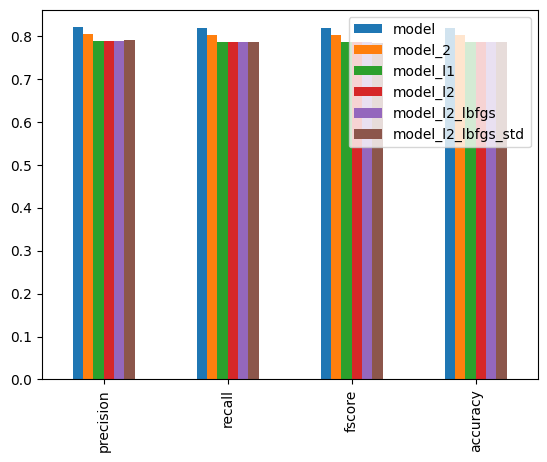

In [130]:
metrics.plot(kind='bar')

As we see we get maximum result in model with L2 regularization where solver lbfgs

**Taking Input and Prediction**

In [131]:
 input_data = (49,1,2,120,188,0,1,139,0,2,1,3,3)

 #change the input data to a numpy array
 input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_l2_lbfgs.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


**Build-In Classifier**

In [133]:
classifier =svm.SVC(kernel='linear')

In [134]:
#training the support vector machine Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [135]:
Y_pred=classifier.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.819672131147541

 **Creating Premium Version**

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#the parameters to be fit
param_grid = {
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'subsample': [1.0, 0.5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                          param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [15, 25, 50, 100, 200, 400],
                         'subsample': [1.0, 0.5]},
             scoring='accuracy')

In [137]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5}

In [138]:
Y_pred = grid_search.predict(X_test)
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [139]:
accuracy_score(Y_pred,Y_test)

0.7868852459016393

In [140]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
k_param = { 'n_neighbors': [3,5,7,9,11] }
k_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=k_param, scoring='accuracy', n_jobs=-1)
k_search.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [142]:
k_search.best_params_

{'n_neighbors': 5}

In [157]:
estimators = [('LR',LogisticRegressionCV(Cs=10,cv=4,penalty='l2')),('KNN',KNeighborsClassifier(n_neighbors=3)),('dt',DecisionTreeClassifier())]

In [158]:
clf = StackingClassifier( estimators=estimators, final_estimator= SVC())

In [159]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('LR', LogisticRegressionCV(cv=4)),
                               ('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [160]:
Y_pred=clf.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.8524590163934426

**Where Build-in Classifier Accuracy was 0.819672131147541**

In [161]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [162]:
import pickle

In [163]:
filename = 'heart_model.sav'
pickle.dump(clf,open(filename,'wb'))

In [164]:
#loading the saved model
loaded_model = pickle.load(open('heart_model.sav','rb'))

In [165]:
input_data = (49,1,2,120,188,0,1,139,0,2,1,3,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [166]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
